In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

In [7]:
def translate_type_to_english(type):
    if type == 'Hevoset ja ponit, kuivalanta yhteensä varastosta':
        return 'Horses and Ponies, Total Solid Manure from Storage'
    elif type == 'Nautojen lietelanta eläinsuojasta 2015':
        return 'Beef Cattle Liquid Manure from Animal Housing'
    elif type == 'Lihakarjan lietelanta eläinsuojasta':
        return 'Beef Cattle Liquid Manure from Animal Housing'
    elif type == 'Lihakarjan kuivalanta yhteensä varastosta':
        return 'Beef Cattle Total Solid Manure from Storage'
    elif type == 'Broilerit, kalkkunat ja muu siipikarja kuivalanta yhteensä varastosta':
        return 'Broilers, Turkeys, and Other Poultry Total Solid Manure from Storage'
    elif type == 'Emakot ja porsaat lietelanta eläinsuojasta':
        return 'Sows and Piglets Liquid Manure from Animal Housing'
    elif type == 'Sikojenkuivalantavarastosta2016':
        return 'Sows and Piglets Total Solid Manure from Storage'
    elif type == 'Emakot ja porsaat kuivalanta yhteensä varastosta':
        return 'Sows and Piglets Total Solid Manure from Storage'
    elif type == 'Sivuvirta: Kesantonurmi':
        return 'Side-stream: Grassland Residue'
    elif type == 'Sivuvirta: Olki':
        return 'Side-stream: Straw'
    elif type == 'Sivuvirta: Kuivaheinänurmet':
        return 'Side-stream: Dry Hayfields'


In [8]:
def deduce_TS_rate(type):
    if type == 'Hevoset ja ponit, kuivalanta yhteensä varastosta':
        return 35.0
    elif type == 'Nautojen lietelanta eläinsuojasta 2015':
        return 9.0
    elif type == 'Lihakarjan lietelanta eläinsuojasta':
        return 9.0
    elif type == 'Lihakarjan kuivalanta yhteensä varastosta':
        return 30.0
    elif type == 'Broilerit, kalkkunat ja muu siipikarja kuivalanta yhteensä varastosta':
        return 68.0
    elif type == 'Emakot ja porsaat lietelanta eläinsuojasta':
        return 8.2
    elif type == 'Sikojenkuivalantavarastosta2016':
        return 21.0
    elif type == 'Emakot ja porsaat kuivalanta yhteensä varastosta':
        return 21.0
    elif type == 'Sivuvirta: Kesantonurmi':
        return 30.0
    elif type == 'Sivuvirta: Olki':
        return 90.0
    elif type == 'Sivuvirta: Kuivaheinänurmet':
        return 40.0
    else:
        return 0.0  

In [9]:
def load_geojsons():
    
    folder_path = './geojsons/Nearest'
    
    # Get a list of all files in the folder
    file_list = os.listdir(folder_path)
    
    # Initialize an empty list to store the GeoDataFrames
    geojson_data = []
    
    for file_name in file_list:
        if file_name.endswith('.geojson'):  
            file_path = os.path.join(folder_path, file_name)
            data = gpd.read_file(file_path)
            data['TS-rate'] = data['Type'].apply(deduce_TS_rate)
            data['Type'] = data['Type'].apply(translate_type_to_english)
            geojson_data.append(data)
            
    return geojson_data

In [16]:
def plot_geojson(geojson):
    
    color_mapping = {
        translate_type_to_english('Hevoset ja ponit, kuivalanta yhteensä varastosta'): '#1f77b4',
        translate_type_to_english('Nautojen lietelanta eläinsuojasta 2015'): '#ff7f0e',
        translate_type_to_english('Lihakarjan lietelanta eläinsuojasta'): '#ff7f0e',
        translate_type_to_english('Lihakarjan kuivalanta yhteensä varastosta'): '#2ca02c',
        translate_type_to_english('Broilerit, kalkkunat ja muu siipikarja kuivalanta yhteensä varastosta'): '#d62728',
        translate_type_to_english('Emakot ja porsaat lietelanta eläinsuojasta'): '#9467bd',
        translate_type_to_english('Sikojenkuivalantavarastosta2016'): '#8c564b',
        translate_type_to_english('Emakot ja porsaat kuivalanta yhteensä varastosta'): '#8c564b',
        translate_type_to_english('Sivuvirta: Kesantonurmi'): '#e377c2',
        translate_type_to_english('Sivuvirta: Olki'): '#7f7f7f',
        translate_type_to_english('Sivuvirta: Kuivaheinänurmet'): '#17becf'
    }
        
    unique_colors = list(set(color_mapping.values()))  # Get unique colors from the color mapping
    
    fig, ax = plt.subplots(figsize=(15, 10))
    handles = []  # Store legend handles for unique colors

    for index, row in geojson.iterrows():
        color = color_mapping.get(row['Type'].strip(), 'k')  # Use black color if type not found in mapping
        ax.plot(row['geometry'].x, row['geometry'].y, marker='o', markersize=8, color=color)

    # Remove unwanted entries from color_mapping dictionary
 #   del color_mapping[translate_type_to_english('Nautojen lietelanta eläinsuojasta 2015')]
  #  del color_mapping[translate_type_to_english('Sikojenkuivalantavarastosta2016')]
        
    # Create a legend
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8) for color in color_mapping.values()]
    legend_labels = color_mapping.keys()
    ax.legend(legend_handles, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

    # Set plot title and labels (customize as needed)
    ax.set_title('Pick up sites for different biomass types')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    
    plt.tight_layout()
    fig.savefig('nearestpickupsites.pdf', dpi=200)
    
    # Show the plot
    plt.show()


In [17]:
def main():
    
    geojson_data = load_geojsons()
    
    # Concatenate all GeoDataFrames into a single GeoDataFrame
    combined_data = gpd.GeoDataFrame(pd.concat(geojson_data, ignore_index=True))
    print(combined_data)  
    # Save the combined GeoJSON to a file
    # combined_data.to_file('nearest_pickup_sites.geojson', driver='GeoJSON')
    
    plot_geojson(combined_data)

     Clustermasses                                               Type  \
0       117.545313  Horses and Ponies, Total Solid Manure from Sto...   
1       106.002088  Horses and Ponies, Total Solid Manure from Sto...   
2       129.508765  Horses and Ponies, Total Solid Manure from Sto...   
3       117.797465  Horses and Ponies, Total Solid Manure from Sto...   
4       733.480663  Horses and Ponies, Total Solid Manure from Sto...   
..             ...                                                ...   
389     502.676106                         Side-stream: Dry Hayfields   
390     414.605125                         Side-stream: Dry Hayfields   
391     157.524440                         Side-stream: Dry Hayfields   
392     269.840265                         Side-stream: Dry Hayfields   
393     798.439588                         Side-stream: Dry Hayfields   

           lon        lat                   geometry  TS-rate  
0    23.352659  60.945884  POINT (23.35266 60.94588)     35

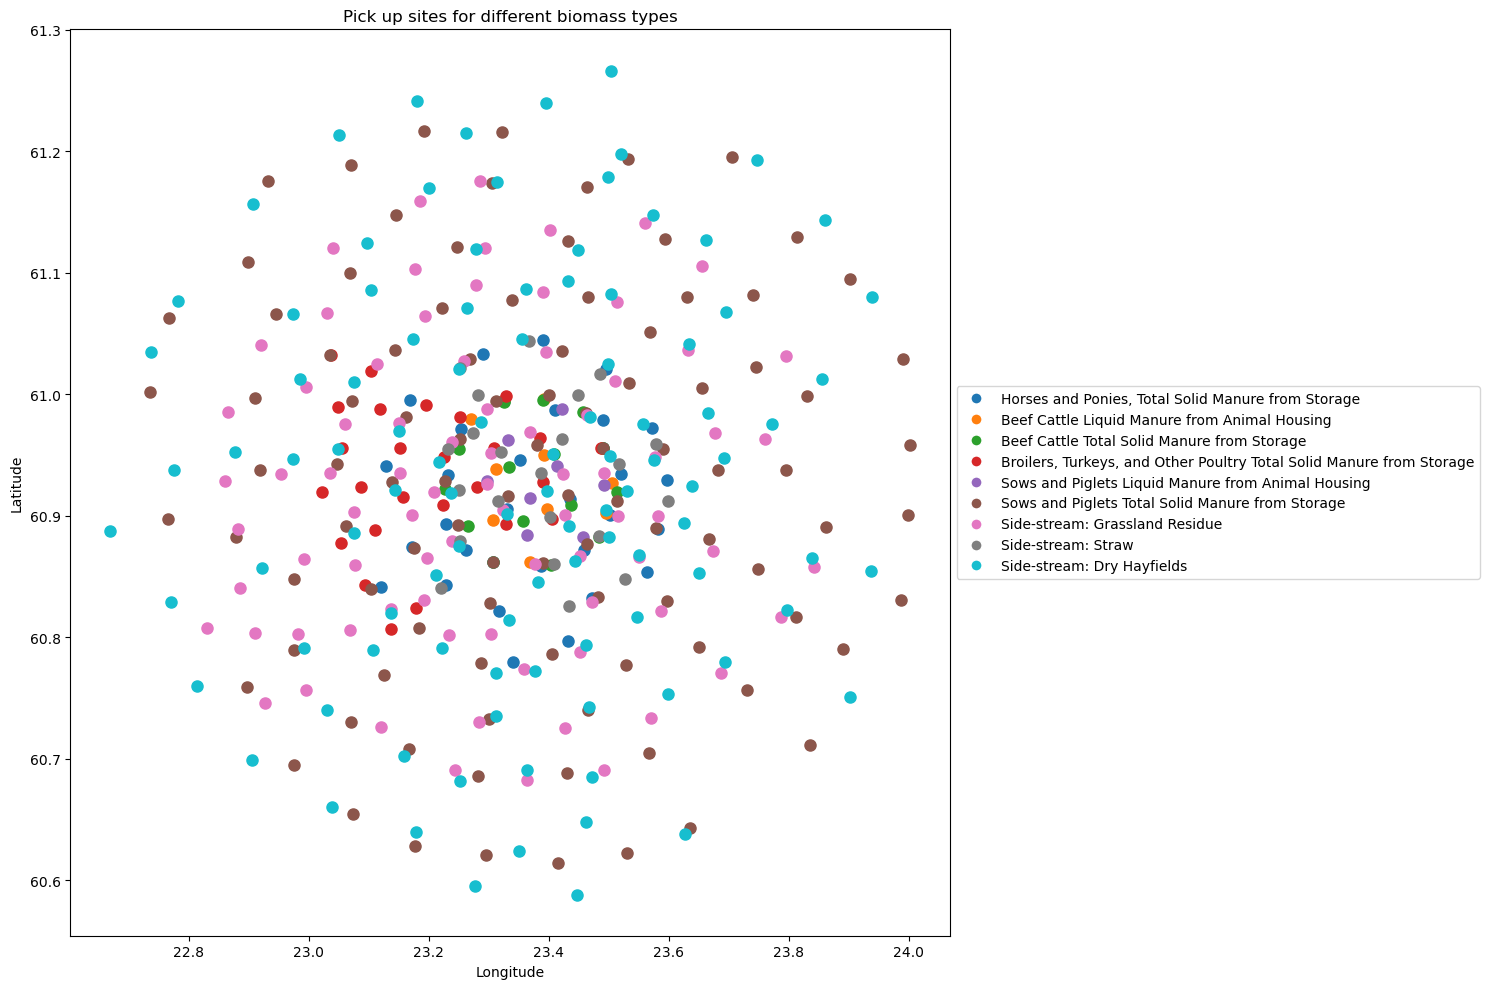

In [18]:
main()